# BEFORE DATA ANALYSIS

+ 1. EDA
+ 2. Feature Engineering

In [24]:
#1. 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False
import re


titanic = pd.read_csv("data/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. Explorer Data Analysis(EDA)

+ 데이터를 빠르게 탐색하는 것을 의미하는 듯
+ 필요한 데이터, 불필요한 데이터를 구분, 파악

In [ ]:
## titanic data에서의 핵심은 'Survived'이다. 살 수 있는가 없는가? 이게 핵심이자 최종 목표다.

## 성별에 따른 생존 여부
## 객실등급별에 따른 생존 여부
## 나이에 따른 생존 여부
## 동승자 여부에 따른 생존 여부 등
## 정박지에 따른 생존 여부

## 어떤 원인(독립)변수가 생존 여부(결과, 종속변수)에 영향을 주는지, 관계가 있는지 파악하기
## 그래프로 일일이 그려가면서?
## 파이썬의 기능을 최대한 잘 활용하자!
## 함수, 반복문을 만들어서 자동으로 분석할 수 있게

In [25]:
def bar_plot(feature):
    survived = titanic[titanic['Survived'] == 1][feature].value_counts()
    dead = titanic[titanic['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

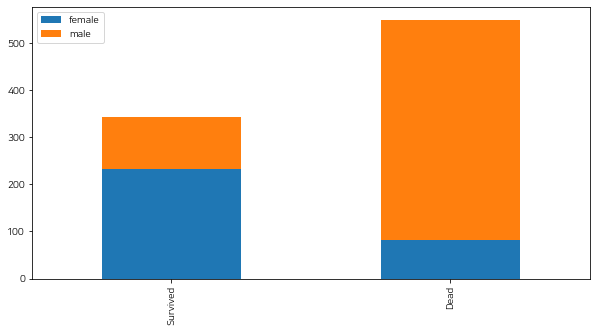

In [ ]:
bar_plot('Sex')

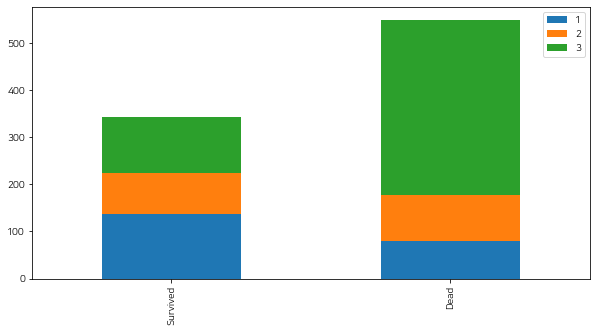

In [ ]:
bar_plot("Pclass")

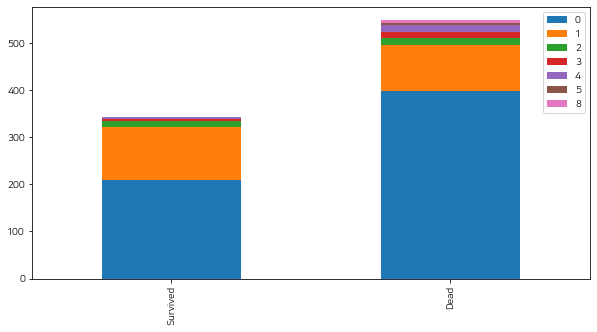

In [ ]:
bar_plot("SibSp")

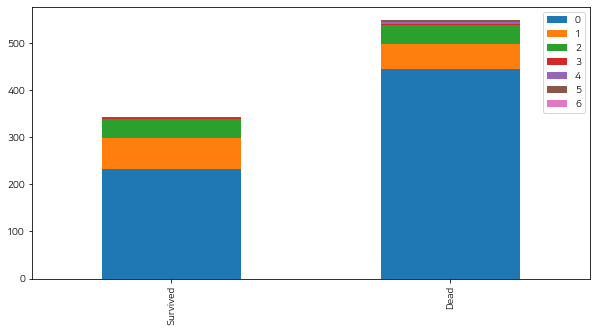

In [ ]:
bar_plot("Parch")

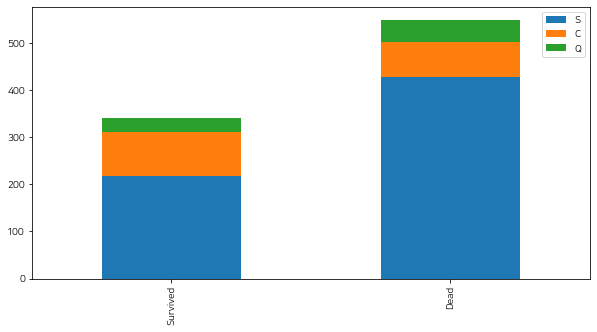

In [ ]:
bar_plot("Embarked")

In [ ]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## 2. Feature Engineering

+ 이상치 제거
+ 결측치 제거
+ 데이터 기반 파생변수 생성
+ 데이터 분석 전 데이터 다듬기 단계

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 결측치 확인
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# 이름에서 호칭 빼기
titanic['Title'] = titanic['Name'].str.extract(", (\w+).")
titanic['Title'] = titanic['Name'].str.extract(" ([a-zA-Z]+)\.")
titanic['Title'].value_counts()

titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [28]:
# df 내 타이틀 칼럼의 값들을 숫자로, 즉 더미변수로 바꿔주기

title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Major":3, "Mlle":3,
                "Col":3, "Sir":3, "Don":3, "Mme":3, "Lady":3, "Jonkheer":3, "Countess":3,
                "Capt":3, "Ms":3}

titanic['Title'] = titanic['Title'].map(title_mapping)



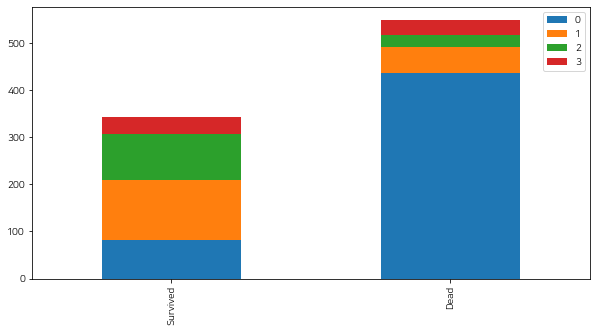

In [29]:
bar_plot('Title')

In [31]:
#### Age 결측치 처리

# 호칭에 따른 나이 평균을 채워서 결측치 처리하자.
# 삭제, 평균 넣어주기가 보편적인 방법.
# 삭제는 아까운 데이터를 날리는 것. 너무 아까우니 가능한 살리는 방안으로

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [38]:
titanic.Age.groupby(titanic.Title).mean()

# 이 값을 결측치에만 넣어주자. fillna() 사용
# 함수 적용을 모든 값에 해줄 땐 transform! 기억하자. apply나 agg는 개별
titanic.Age.fillna(titanic.Age.groupby(titanic.Title).transform('median'), inplace=True)
titanic.Age.describe()

count    891.000000
mean      29.372806
std       13.227346
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

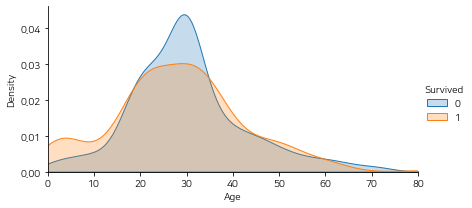

In [45]:
facet = sns.FacetGrid(titanic, hue='Survived', aspect=2)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim = (0, titanic['Age'].max()))

(20.0, 30.0)

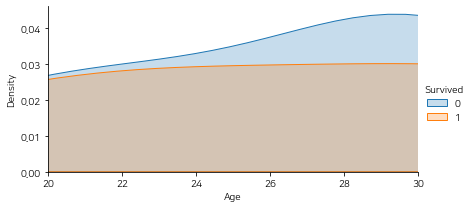

In [46]:
# 특정범위만 그래프로 표현할 수도 있다.
facet = sns.FacetGrid(titanic, hue='Survived', aspect=2)
facet.map(sns.kdeplot, "Age", shade=True)
facet.add_legend()
facet.set(xlim = (0, titanic['Age'].max()))

plt.xlim(20, 30) #20대에서 30대